## Exercises for Physical Models for Living Systems, homework 5
Group members:
* Golan Rodrigo 1142802
* Zoppellari Elena 2076715

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint

The Wilson-Cowan model without refractory dynamics is expressed by the following system:

$$
\begin{cases}
\dot{x} = -\alpha_E x + f(\omega_{EE} x - \omega_{IE}y+h_E) \\
\dot{y} = -\alpha_I y + f(\omega_{EI} x - \omega_{II}y+h_I),
\end{cases}
$$

where $f(z)$ represent the activation function. In particular, we have chosen to work with two different activation functions: the notorious logistic function $f(z) = \frac{1}{1+exp(-z)}$ and the ReLU $f(z) = max(0,z)$.

In a general framework, if we choose to set the self-interacting terms to zero $\omega_{EE} = \omega_{II} = 0$ and $\alpha_E = \alpha_I = 1$, we obtain the following stationary solution:

$$
\begin{cases}
\tilde{x} = f(h_E - \omega_{IE}\tilde{y}) \\
\tilde{y} = f(h_I + \omega_{EI}\tilde{x}).
\end{cases}
$$

Calling $A=\frac{\partial}{\partial y} f(h_E - \omega_{IE}y)_{|y=\tilde{y}}$ and $B=\frac{\partial}{\partial x} f(h_I + \omega_{EI}x)_{|x=\tilde{x}}$, the Jacobian evaluated at the stationary point will be:

$$
J(\tilde{x},\tilde{y})=
\begin{bmatrix}
-1 & A \\
B & -1.
\end{bmatrix}
$$

Therefore, the eigenvalues of $J(\tilde{x},\tilde{y})$ will solve the following equation:

$$
\left( -1 - \lambda \right)^2 - AB = 0,
$$

which leads to:

$$
\lambda^*_{1,2} = 
\begin{cases}
-1 \pm \sqrt{|AB|} \qquad if \quad AB > 0 \rightarrow \begin{cases}\textbf{stable node} \quad if \quad 0 < \sqrt{|AB|} < 1 \\ \textbf{saddle node} \quad if \quad \sqrt{|AB|} > 1 \end{cases}\\
-1 \pm i\sqrt{|AB|} \qquad if \quad AB < 0 \rightarrow \textbf{stable spiral}\\
-1 \qquad \qquad \quad if \quad AB=0 \rightarrow \textbf{stable node}.
\end{cases}
$$

This general analysis shows how the values of $A$ and $B$ are determinant in the behaviour of the stationary solution. Nevertheless, the analytical calculation of these two values is not straightforward. In order to visualize a simple case using ReLU as activation function, we can further assume that $h_E = \frac{1}{2}$ and $h_I = - \frac{1}{2}$, while we can define $\alpha = w_{EI} = w_{IE}$. In this case the stationary points are:

$$
\tilde{x} = 
\begin{cases}
\frac{1}{2} \qquad if \quad \alpha \leq 1 \\
\frac{\alpha+1}{2(\alpha^2+1)} \quad if \quad \alpha > 1
\end{cases}
\qquad
\tilde{y} = 
\begin{cases}
0 \qquad if \quad \alpha \leq 1 \\
\frac{\alpha-1}{2(\alpha^2+1)} \quad if \quad \alpha > 1.
\end{cases}
$$

Since:

$$
\frac{\partial}{\partial y} max(0, \frac{1}{2}-\alpha y) = 
\begin{cases}
0 \qquad if \quad \alpha y > \frac{1}{2} \\
-\alpha \qquad if \quad \alpha y < \frac{1}{2}
\end{cases}
\qquad
\frac{\partial}{\partial x} max(0, \frac{1}{2}+\alpha x) = 
\begin{cases}
0 \qquad if \quad \alpha x < -\frac{1}{2} \\
\alpha \qquad if \quad \alpha x > -\frac{1}{2}
\end{cases}
$$

we can identify three situations depending on the value of $\alpha$:

1. $\alpha \leq -1$: $\begin{cases} \tilde{x} = \frac{1}{2} \\ \tilde{y} = 0 \end{cases}$ as the stationary point with $AB=0$, which therefore is a stable node
2. $-1 < \alpha \leq 1$: $\begin{cases} \tilde{x} = \frac{1}{2} \\ \tilde{y} = 0 \end{cases}$ as the stationary point with $AB=-\alpha^2$ which therefore is a stable spiral
3. $\alpha > 1$: $\begin{cases} \tilde{x} = \frac{\alpha+1}{2(\alpha^2+1)} \\ \tilde{y} = \frac{\alpha-1}{2(\alpha^2+1)} \end{cases}$ as the stationary point with $AB=-\alpha^2$ which therefore is a stable spiral.


In [4]:
def ReLU(x):
    return x * (x > 0)

E_0 = 3
I_0 = 3
w_EE = .0; w_EI = -1; w_II = .0; h_E = 0.5; h_I = -.5;
#Here + signs are wrong in the activation function, w_IE should have - !!!
# but it is ok, corrected below by substituting + with - when initializing w_IE
def system(s, t, w_EE, w_EI, w_IE, w_II, h_E, h_I, refrac = False):
    E, I = s
    if refrac:
        dE_dt =(-E + (1-E)*ReLU(h_E + w_EE * E + w_EI * I ) )               
        dI_dt =(-I + (1-I)*ReLU(h_I + w_IE * E + w_II * I ) )              
    else:
        dE_dt =(-E + ReLU(h_E + w_EE * E + w_EI * I ) )               
        dI_dt =(-I + ReLU(h_I + w_IE * E + w_II * I ) )              
    
    return [dE_dt, dI_dt]
def systemsig(s, t, w_EE, w_EI, w_IE, w_II, h_E, h_I, refrac = False):
    E, I = s
    if refrac:
        dE_dt =(-E + (1-E)*sigmoid(h_E + w_EE * E + w_EI * I ) )               
        dI_dt =(-I + (1-I)*sigmoid(h_I + w_IE * E + w_II * I ) )              
    
    else:
        dE_dt =(-E + sigmoid(h_E + w_EE * E + w_EI * I ) )               
        dI_dt =(-I + sigmoid(h_I + w_IE * E + w_II * I ) )              
    
    return [dE_dt, dI_dt]

t = np.linspace(0, 10, 1000)   # time_domain

s0 = [E_0, I_0]   # initial conditions

w_IE_list = [-5, 0.5, 5]


Text(0.5, 0.98, 'ReLU as activation')

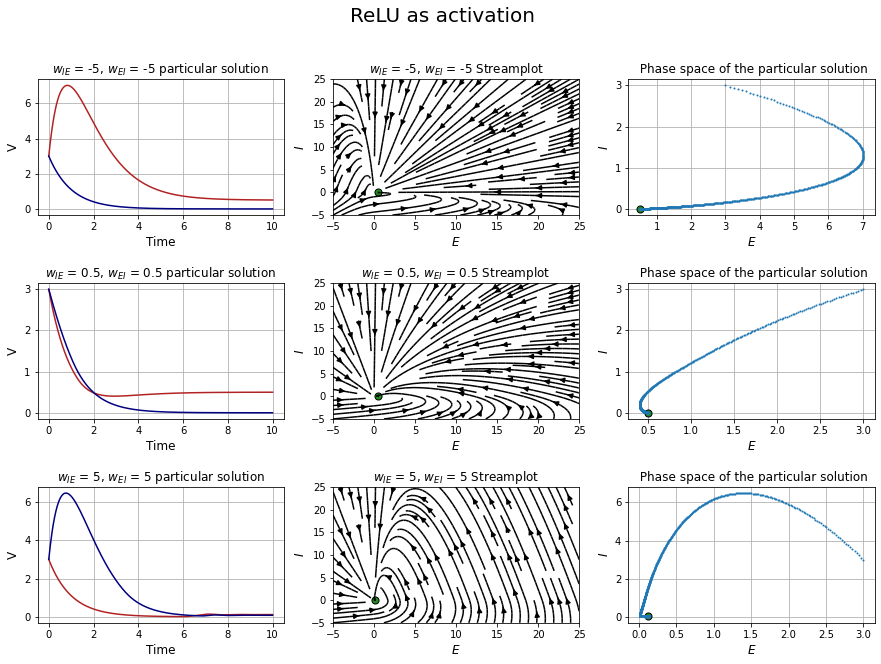

In [233]:
solutions = []
fixed_point = []
for w_IE in w_IE_list:
    w_EI= -w_IE
    solution = odeint(system, s0, t, args=(w_EE, w_EI, w_IE, w_II, h_E, h_I))
    solutions.append(solution)
    #fixed_point.append(fsolve(wilson_cowan_model, [1, 1], args=(w_EI, w_IE, h_E, h_I)))
    fixed_point.append( np.round(fsolve(system, [1, 1], args=(t, w_EE, w_EI, w_IE, w_II, h_E, h_I)), decimals=3))
    # solution = odeint(systemsig, s0, t, args=(w_EE, w_EI, w_IE, w_II, h_E, h_I))
    # solutions.append(solution)
fig, ax_ = plt.subplots(3, 3, figsize = (15, 10))
ax = ax_.flatten()
for i in range(3):
    X, Y = np.meshgrid(np.linspace(-5, 25, 200), np.linspace(-5, 25, 200))
    U, V = system([X, Y], '', w_EE, w_EI, w_IE_list[i], w_II, h_E, h_I)

    ax[3 * i].plot(t, solutions[i][:, 0], color = 'firebrick', zorder = 2)
    ax[3 * i].plot(t, solutions[i][:, 1], color = 'navy', zorder = 2)
    ax[3 * i].set_xlabel('Time', fontsize = 12)
    ax[3 * i].set_ylabel('V', fontsize = 12)
    ax[3 * i].grid(zorder = 1)
    ax[3 * i].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{w_IE_list[i]}" +  ' particular solution')
    ax[3 * i + 1].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{w_IE_list[i]}" +   ' Streamplot')
    ax[3 * i + 1].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')
    ax[3 * i + 2].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')    
    ax[3 * i + 1].streamplot(X, Y, U, V, density = 1, color = 'black')
    ax[3 * i + 1].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 1].set_ylabel('$I$', fontsize = 12)
    ax[3 * i + 2].scatter(solutions[i][:, 0], solutions[i][:, 1], color = 'C0', label = 'Initial conditions', s=1,\
        zorder = 2)
    ax[3 * i + 2].set_title(' Phase space of the particular solution')
    ax[3 * i + 2].grid(zorder = 1)
    ax[3 * i + 2].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 2].set_ylabel('$I$', fontsize = 12)
#ax.plot(t, solutions[0][:, 0])
#ax.plot(t, solutions[0][:, 1])

#ax1.streamplot(X, Y, U, V, density = 1, color = 'black')
#fig.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.suptitle("ReLU as activation", fontsize=20)

Text(0.5, 0.98, 'Sigmoid as activation')

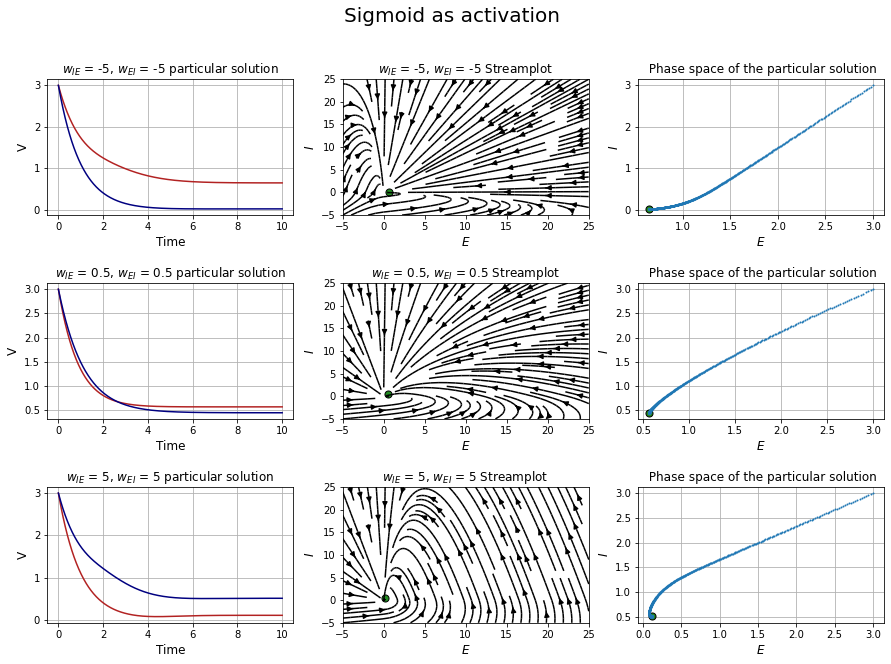

In [238]:
#sigmoid 
t = np.linspace(0, 10, 1000)
solutions = []
fixed_point = []
for w_IE in w_IE_list:
    w_EI=-w_IE
    #fixed_point.append(np.round(fsolve(wilson_cowan_model, [0, 0], args=(w_EI, w_IE, h_E, h_I)), decimals=3))
    fixed_point.append(np.round((fsolve(systemsig, [1, 1], args=(t, w_EE, w_EI, w_IE, w_II, h_E, h_I))), decimals=3))
    solution = odeint(systemsig, s0, t, args=(w_EE, w_EI, w_IE, w_II, h_E, h_I))
    solutions.append(solution)

fig, ax_ = plt.subplots(3, 3, figsize = (15, 10))
ax = ax_.flatten()
for i in range(3):
    X, Y = np.meshgrid(np.linspace(-5, 25, 200), np.linspace(-5, 25, 200))
    U, V = system([X, Y], '', w_EE, w_EI, w_IE_list[i], w_II, h_E, h_I)

    ax[3 * i].plot(t, solutions[i][:, 0], color = 'firebrick', zorder = 2)
    ax[3 * i].plot(t, solutions[i][:, 1], color = 'navy', zorder = 2)
    ax[3 * i].set_xlabel('Time', fontsize = 12)
    ax[3 * i].set_ylabel('V', fontsize = 12)
    ax[3 * i].grid(zorder = 1)
    ax[3 * i].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{w_IE_list[i]}" +  ' particular solution')
    ax[3 * i + 1].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{w_IE_list[i]}" +   ' Streamplot')
    ax[3 * i + 1].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')
    ax[3 * i + 2].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')    
    ax[3 * i + 1].streamplot(X, Y, U, V, density = 1, color = 'black')
    ax[3 * i + 1].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 1].set_ylabel('$I$', fontsize = 12)
    ax[3 * i + 2].scatter(solutions[i][:, 0], solutions[i][:, 1], color = 'C0', label = 'Initial conditions', s=1,\
        zorder = 2)
    ax[3 * i + 2].set_title(' Phase space of the particular solution')
    ax[3 * i + 2].grid(zorder = 1)
    ax[3 * i + 2].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 2].set_ylabel('$I$', fontsize = 12)
#ax.plot(t, solutions[0][:, 0])
#ax.plot(t, solutions[0][:, 1])

#ax1.streamplot(X, Y, U, V, density = 1, color = 'black')
#fig.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.suptitle("Sigmoid as activation", fontsize=20)

### Adding refractory dynamics

Considering also the refractory dynamics, which introduces a temporal delay in the recovery of excitatory and inhibitory populations after spiking, the Wilson-Cowan model is:

$$
\begin{cases}
\dot{x} = -\alpha_E x + (1-x)rf(\omega_{EE} x - \omega_{IE}y+h_E) \\
\dot{y} = -\alpha_I y + (1-y)rf(\omega_{EI} x - \omega_{II}y+h_I).
\end{cases}
$$

Choosing to set $\omega_{EE}=\omega_{II}=0$ and $\alpha_E=\alpha_I=1$, the stationary solution in this case is:

$$
\begin{cases}
\tilde{x} = (1-\tilde{x})rf(h_E - \omega_{IE}\tilde{y}) \\
\tilde{y} = (1-\tilde{y})rf(h_I + \omega_{EI}\tilde{x}).
\end{cases}
$$

Calling $A=\frac{\partial}{\partial y} f(h_E - \omega_{IE}y)_{|y=\tilde{y}}$ and $B=\frac{\partial}{\partial x} f(h_I + \omega_{EI}x)_{|x=\tilde{x}}$ as before and defining $C=f(h_I+\omega_{EI}\tilde{x})$ and $D=f(h_E-\omega_{IE}\tilde{y})$, the Jacobian evaluated at the stationary point will be:

$$
J(\tilde{x},\tilde{y})=
\begin{bmatrix}
-1 - rD & (1-\tilde{x})rA \\
(1-\tilde{y})rB & -1-rC
\end{bmatrix}.
$$

It can be preliminary deduced that the eigenvalues in this framework will depend on many variables respect to the non-refractory dynamics model. In fact, the eigenvalues of $J(\tilde{x},\tilde{y})$ solve the equation:

$$
\lambda^2 + \lambda \left( 2+rC+rD \right) +1 + rC + rD - (1-\tilde{x})(1-\tilde{y})AB = 0
$$

which leads to:

$$
\lambda^*_{1,2} = -1-r\frac{C+D}{2} \pm \sqrt{(C+D)^2+4(1-\tilde{x})(1-\tilde{y})AB}.
$$

Compared to the case without refractory dynamics, if we consider as activation functions the sigmoid and the ReLU (i.e. if we assure that $C$ and $D$ are positive) as before, we can state that the real part of the eigenvalues is always more negative, which for stable solution grant more stability. This observations has a general ground: refractory dynamics tends to make the system more stable by preventing immediate re-excitation. Nevertheless, respect to the previous case the argument of the square-root's sign depends on more variables. For the considered activation functions, we can make the following two observations:
* if $AB=0$: $\lambda^*_1=-1+\frac{1}{2}r(C+D)$, $\lambda^*_2=-1-\frac{3}{2}r(C+D)$ which can describe a saddle node if $\lambda^*_1 > 0 $ or stable node if $\lambda^*_1 < 0$.
* if $AB < - \frac{(C+D)^2}{4(1-\tilde{x})(1-\tilde{y})}$ the argument of square root term is negative and therefore the eigenvalues are complex. In particular, since the real term is always negative, the stationary point will be a stable spiral. In general, the refractory period acts as a constraint on the rapid firing of neurons dampening the amplitude of oscillations.

Text(0.5, 0.98, 'ReLU as activation (with refractory dynamics)')

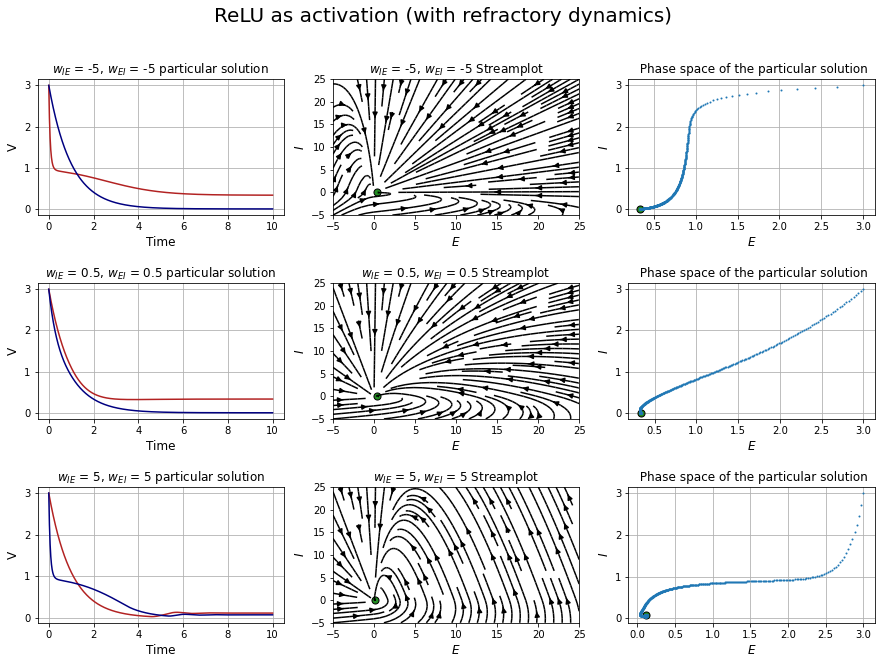

In [234]:

solutions = []
fixed_point = []
for w_IE in w_IE_list:
    w_EI= -w_IE
    solution = odeint(system, s0, t, args=(w_EE, w_EI, w_IE, w_II, h_E, h_I, True))
    solutions.append(solution)
    #fixed_point.append(fsolve(wilson_cowan_model, [1, 1], args=(w_EI, w_IE, h_E, h_I,True)))
    fixed_point.append(np.round((fsolve(system, [1, 1], args=(t, w_EE, w_EI, w_IE, w_II, h_E, h_I, True))), decimals=3))

fig, ax_ = plt.subplots(3, 3, figsize = (15, 10))
ax = ax_.flatten()
for i in range(3):
    X, Y = np.meshgrid(np.linspace(-5, 25, 200), np.linspace(-5, 25, 200))
    U, V = system([X, Y], '', w_EE, w_EI, w_IE_list[i], w_II, h_E, h_I)

    ax[3 * i].plot(t, solutions[i][:, 0], color = 'firebrick', zorder = 2)
    ax[3 * i].plot(t, solutions[i][:, 1], color = 'navy', zorder = 2)
    ax[3 * i].set_xlabel('Time', fontsize = 12)
    ax[3 * i].set_ylabel('V', fontsize = 12)
    ax[3 * i].grid(zorder = 1)
    ax[3 * i].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{w_IE_list[i]}" +  ' particular solution')
    ax[3 * i + 1].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{w_IE_list[i]}" +   ' Streamplot')
    ax[3 * i + 1].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')
    ax[3 * i + 2].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')    
    ax[3 * i + 1].streamplot(X, Y, U, V, density = 1, color = 'black')
    ax[3 * i + 1].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 1].set_ylabel('$I$', fontsize = 12)
    ax[3 * i + 2].scatter(solutions[i][:, 0], solutions[i][:, 1], color = 'C0', label = 'Initial conditions', s=1,\
        zorder = 2)
    ax[3 * i + 2].set_title(' Phase space of the particular solution')
    ax[3 * i + 2].grid(zorder = 1)
    ax[3 * i + 2].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 2].set_ylabel('$I$', fontsize = 12)
#ax.plot(t, solutions[0][:, 0])
#ax.plot(t, solutions[0][:, 1])

#ax1.streamplot(X, Y, U, V, density = 1, color = 'black')
#fig.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.suptitle("ReLU as activation (with refractory dynamics)", fontsize=20)

Text(0.5, 0.98, 'Sigmoid as activation (with refractory dynamics)')

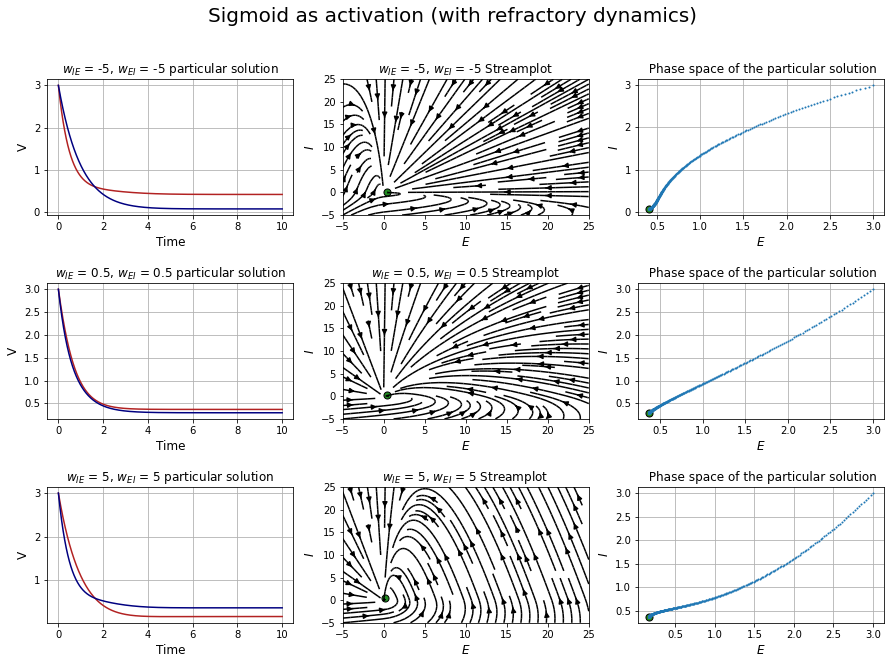

In [239]:
#sigmoid refrac
solutions = []
fixed_point = []
for w_IE in w_IE_list:
    w_EI=-w_IE
    #fixed_point.append(np.round(fsolve(wilson_cowan_model, [1, 1], args=(w_EI, w_IE, h_E, h_I, True)), decimals=3))
    fixed_point.append(np.round((fsolve(systemsig, [1, 1], args=(t, w_EE, w_EI, w_IE, w_II, h_E, h_I, True))), decimals=3))
    solution = odeint(systemsig, s0, t, args=(w_EE, w_EI, w_IE, w_II, h_E, h_I, True))
    solutions.append(solution)

fig, ax_ = plt.subplots(3, 3, figsize = (15, 10))
ax = ax_.flatten()
for i in range(3):
    X, Y = np.meshgrid(np.linspace(-5, 25, 200), np.linspace(-5, 25, 200))
    U, V = system([X, Y], '', w_EE, w_EI, w_IE_list[i], w_II, h_E, h_I)

    ax[3 * i].plot(t, solutions[i][:, 0], color = 'firebrick', zorder = 2)
    ax[3 * i].plot(t, solutions[i][:, 1], color = 'navy', zorder = 2)
    ax[3 * i].set_xlabel('Time', fontsize = 12)
    ax[3 * i].set_ylabel('V', fontsize = 12)
    ax[3 * i].grid(zorder = 1)
    ax[3 * i].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{w_IE_list[i]}" +  ' particular solution')
    ax[3 * i + 1].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{w_IE_list[i]}" +   ' Streamplot')
    ax[3 * i + 1].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')
    ax[3 * i + 2].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')    
    ax[3 * i + 1].streamplot(X, Y, U, V, density = 1, color = 'black')
    ax[3 * i + 1].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 1].set_ylabel('$I$', fontsize = 12)
    ax[3 * i + 2].scatter(solutions[i][:, 0], solutions[i][:, 1], color = 'C0', label = 'Initial conditions', s=1,\
        zorder = 2)
    ax[3 * i + 2].set_title(' Phase space of the particular solution')
    ax[3 * i + 2].grid(zorder = 1)
    ax[3 * i + 2].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 2].set_ylabel('$I$', fontsize = 12)
#ax.plot(t, solutions[0][:, 0])
#ax.plot(t, solutions[0][:, 1])

#ax1.streamplot(X, Y, U, V, density = 1, color = 'black')
#fig.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.suptitle("Sigmoid as activation (with refractory dynamics)", fontsize=20)

## Numerical approach for the case $|\omega_{EI}| = -|\omega_{IE} |$

In this section, we repeat the simulations for the Wilson-Cowen model with and without refractory dynamics in order to visualize the results for the case $|\omega_{EI}|=-|\omega_{IE}|$

C:\Users\rodri\AppData\Local\Temp\ipykernel_7252\2640633818.py:15: RuntimeWarning: overflow encountered in double_scalars
  dE_dt =(-E + ReLU(h_E + w_EE * E + w_EI * I ) )
C:\Users\rodri\AppData\Local\Temp\ipykernel_7252\2640633818.py:16: RuntimeWarning: overflow encountered in double_scalars
  dI_dt =(-I + ReLU(h_I + w_IE * E + w_II * I ) )
C:\Users\rodri\AppData\Local\Temp\ipykernel_7252\2640633818.py:15: RuntimeWarning: invalid value encountered in double_scalars
  dE_dt =(-E + ReLU(h_E + w_EE * E + w_EI * I ) )
C:\Users\rodri\AppData\Local\Temp\ipykernel_7252\2640633818.py:16: RuntimeWarning: invalid value encountered in double_scalars
  dI_dt =(-I + ReLU(h_I + w_IE * E + w_II * I ) )
C:\Users\rodri\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\rodri\anaconda3\lib\site-packages\scipy\optimize\mi

Text(0.5, 0.98, 'ReLU as activation')

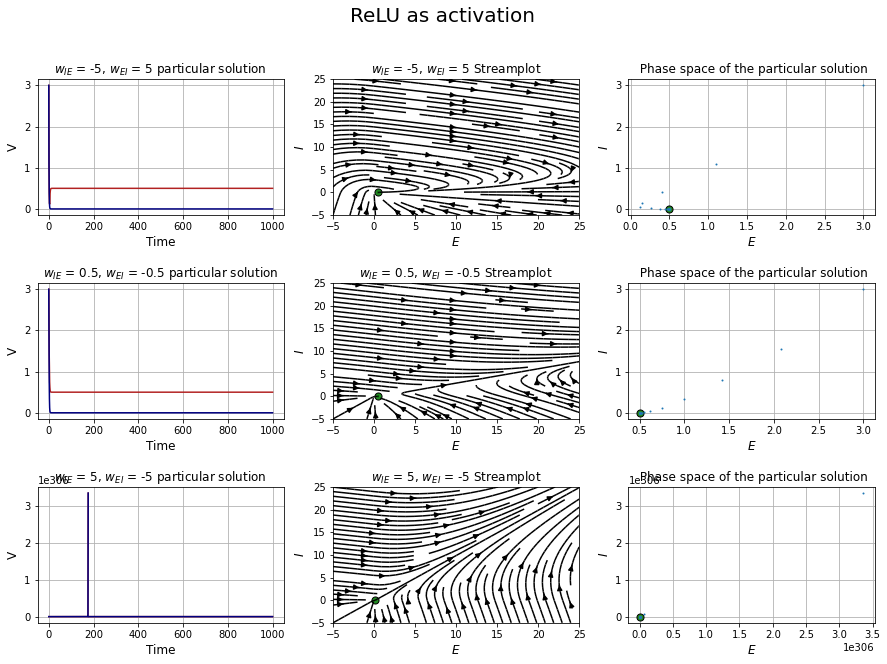

In [245]:
t = np.linspace(0, 1000, 1000)
w_IE_list = [-5, 0.5, 5]
solutions = []
fixed_point = []
for w_IE in w_IE_list:
    w_EI= w_IE
    solution = odeint(system, s0, t, args=(w_EE, w_EI, w_IE, w_II, h_E, h_I))
    solutions.append(solution)
    #fixed_point.append(fsolve(wilson_cowan_model, [1, 1], args=(w_EI, w_IE, h_E, h_I)))
    fixed_point.append( np.round(fsolve(system, [1, 1], args=(t, w_EE, w_EI, w_IE, w_II, h_E, h_I)), decimals=3))
    # solution = odeint(systemsig, s0, t, args=(w_EE, w_EI, w_IE, w_II, h_E, h_I))
    # solutions.append(solution)
fig, ax_ = plt.subplots(3, 3, figsize = (15, 10))
ax = ax_.flatten()
for i in range(3):
    X, Y = np.meshgrid(np.linspace(-5, 25, 200), np.linspace(-5, 25, 200))
    U, V = system([X, Y], '', w_EE, w_EI, w_IE_list[i], w_II, h_E, h_I)

    ax[3 * i].plot(t, solutions[i][:, 0], color = 'firebrick', zorder = 2)
    ax[3 * i].plot(t, solutions[i][:, 1], color = 'navy', zorder = 2)
    ax[3 * i].set_xlabel('Time', fontsize = 12)
    ax[3 * i].set_ylabel('V', fontsize = 12)
    ax[3 * i].grid(zorder = 1)
    ax[3 * i].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{-w_IE_list[i]}" +  ' particular solution')
    ax[3 * i + 1].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{-w_IE_list[i]}" +   ' Streamplot')
    ax[3 * i + 1].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')
    ax[3 * i + 2].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')    
    ax[3 * i + 1].streamplot(X, Y, U, V, density = 1, color = 'black')
    ax[3 * i + 1].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 1].set_ylabel('$I$', fontsize = 12)
    ax[3 * i + 2].scatter(solutions[i][:, 0], solutions[i][:, 1], color = 'C0', label = 'Initial conditions', s=1,\
        zorder = 2)
    ax[3 * i + 2].set_title(' Phase space of the particular solution')
    ax[3 * i + 2].grid(zorder = 1)
    ax[3 * i + 2].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 2].set_ylabel('$I$', fontsize = 12)
#ax.plot(t, solutions[0][:, 0])
#ax.plot(t, solutions[0][:, 1])

#ax1.streamplot(X, Y, U, V, density = 1, color = 'black')
#fig.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.suptitle("ReLU as activation", fontsize=20)

In the above plot the time scale has been increased to showcase the peculiar behaviour of the solution with $\omega_{IE}>1$. As discussed in the previous sections, it might represent a saddle point.

Text(0.5, 0.98, 'ReLU as activation (with refractory dynamics)')

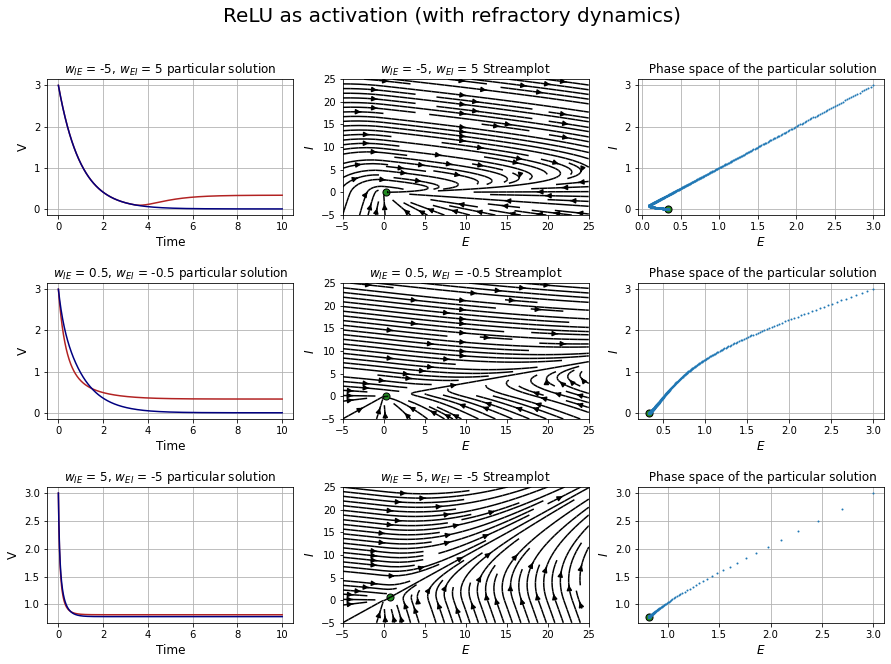

In [241]:

solutions = []
fixed_point = []
for w_IE in w_IE_list:
    w_EI= w_IE
    solution = odeint(system, s0, t, args=(w_EE, w_EI, w_IE, w_II, h_E, h_I, True))
    solutions.append(solution)
    #fixed_point.append(fsolve(wilson_cowan_model, [1, 1], args=(w_EI, w_IE, h_E, h_I,True)))
    fixed_point.append(np.round((fsolve(system, [1, 1], args=(t, w_EE, w_EI, w_IE, w_II, h_E, h_I, True))), decimals=3))

fig, ax_ = plt.subplots(3, 3, figsize = (15, 10))
ax = ax_.flatten()
for i in range(3):
    X, Y = np.meshgrid(np.linspace(-5, 25, 200), np.linspace(-5, 25, 200))
    U, V = system([X, Y], '', w_EE, w_EI, w_IE_list[i], w_II, h_E, h_I)

    ax[3 * i].plot(t, solutions[i][:, 0], color = 'firebrick', zorder = 2)
    ax[3 * i].plot(t, solutions[i][:, 1], color = 'navy', zorder = 2)
    ax[3 * i].set_xlabel('Time', fontsize = 12)
    ax[3 * i].set_ylabel('V', fontsize = 12)
    ax[3 * i].grid(zorder = 1)
    ax[3 * i].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{-w_IE_list[i]}" +  ' particular solution')
    ax[3 * i + 1].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{-w_IE_list[i]}" +   ' Streamplot')
    ax[3 * i + 1].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')
    ax[3 * i + 2].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')    
    ax[3 * i + 1].streamplot(X, Y, U, V, density = 1, color = 'black')
    ax[3 * i + 1].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 1].set_ylabel('$I$', fontsize = 12)
    ax[3 * i + 2].scatter(solutions[i][:, 0], solutions[i][:, 1], color = 'C0', label = 'Initial conditions', s=1,\
        zorder = 2)
    ax[3 * i + 2].set_title(' Phase space of the particular solution')
    ax[3 * i + 2].grid(zorder = 1)
    ax[3 * i + 2].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 2].set_ylabel('$I$', fontsize = 12)
#ax.plot(t, solutions[0][:, 0])
#ax.plot(t, solutions[0][:, 1])

#ax1.streamplot(X, Y, U, V, density = 1, color = 'black')
#fig.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.suptitle("ReLU as activation (with refractory dynamics)", fontsize=20)

Text(0.5, 0.98, 'Sigmoid as activation')

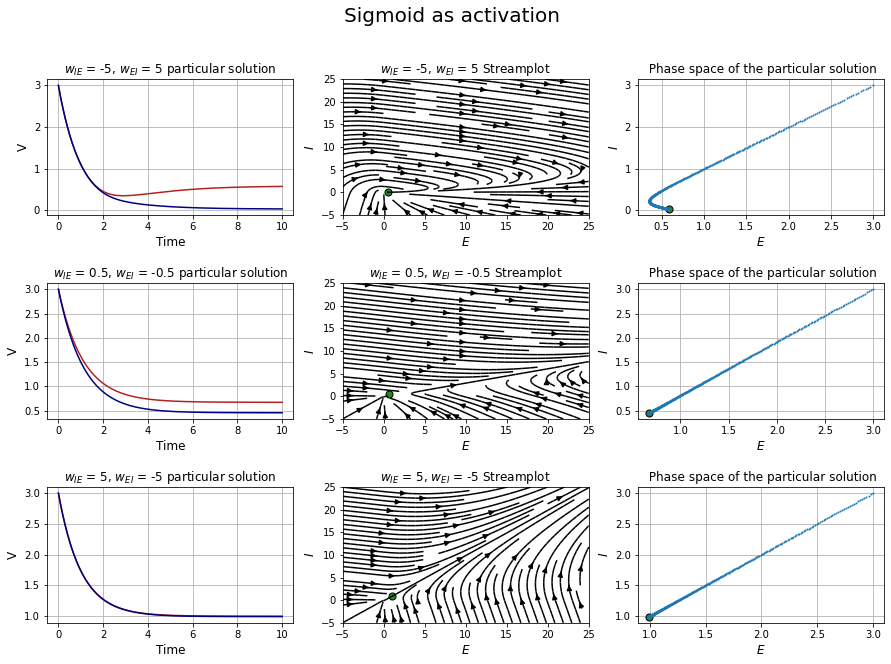

In [242]:
#sigmoid 
t = np.linspace(0, 10, 1000)
solutions = []
fixed_point = []
for w_IE in w_IE_list:
    w_EI=w_IE
    #fixed_point.append(np.round(fsolve(wilson_cowan_model, [0, 0], args=(w_EI, w_IE, h_E, h_I)), decimals=3))
    fixed_point.append(np.round((fsolve(systemsig, [1, 1], args=(t, w_EE, w_EI, w_IE, w_II, h_E, h_I))), decimals=3))
    solution = odeint(systemsig, s0, t, args=(w_EE, w_EI, w_IE, w_II, h_E, h_I))
    solutions.append(solution)

fig, ax_ = plt.subplots(3, 3, figsize = (15, 10))
ax = ax_.flatten()
for i in range(3):
    X, Y = np.meshgrid(np.linspace(-5, 25, 200), np.linspace(-5, 25, 200))
    U, V = system([X, Y], '', w_EE, w_EI, w_IE_list[i], w_II, h_E, h_I)

    ax[3 * i].plot(t, solutions[i][:, 0], color = 'firebrick', zorder = 2)
    ax[3 * i].plot(t, solutions[i][:, 1], color = 'navy', zorder = 2)
    ax[3 * i].set_xlabel('Time', fontsize = 12)
    ax[3 * i].set_ylabel('V', fontsize = 12)
    ax[3 * i].grid(zorder = 1)
    ax[3 * i].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{-w_IE_list[i]}" +  ' particular solution')
    ax[3 * i + 1].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{-w_IE_list[i]}" +   ' Streamplot')
    ax[3 * i + 1].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')
    ax[3 * i + 2].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')    
    ax[3 * i + 1].streamplot(X, Y, U, V, density = 1, color = 'black')
    ax[3 * i + 1].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 1].set_ylabel('$I$', fontsize = 12)
    ax[3 * i + 2].scatter(solutions[i][:, 0], solutions[i][:, 1], color = 'C0', label = 'Initial conditions', s=1,\
        zorder = 2)
    ax[3 * i + 2].set_title(' Phase space of the particular solution')
    ax[3 * i + 2].grid(zorder = 1)
    ax[3 * i + 2].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 2].set_ylabel('$I$', fontsize = 12)
#ax.plot(t, solutions[0][:, 0])
#ax.plot(t, solutions[0][:, 1])

#ax1.streamplot(X, Y, U, V, density = 1, color = 'black')
#fig.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.suptitle("Sigmoid as activation", fontsize=20)

Text(0.5, 0.98, 'Sigmoid as activation (with refractory dynamics)')

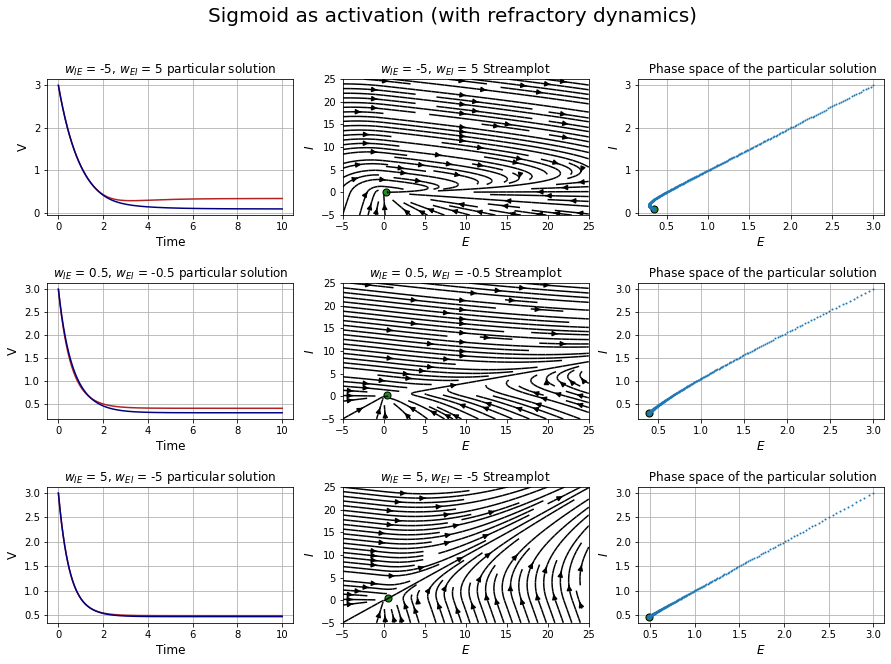

In [243]:
#sigmoid refrac
solutions = []
fixed_point = []
for w_IE in w_IE_list:
    w_EI=w_IE
    #fixed_point.append(np.round(fsolve(wilson_cowan_model, [1, 1], args=(w_EI, w_IE, h_E, h_I, True)), decimals=3))
    fixed_point.append(np.round((fsolve(systemsig, [1, 1], args=(t, w_EE, w_EI, w_IE, w_II, h_E, h_I, True))), decimals=3))
    solution = odeint(systemsig, s0, t, args=(w_EE, w_EI, w_IE, w_II, h_E, h_I, True))
    solutions.append(solution)

fig, ax_ = plt.subplots(3, 3, figsize = (15, 10))
ax = ax_.flatten()
for i in range(3):
    X, Y = np.meshgrid(np.linspace(-5, 25, 200), np.linspace(-5, 25, 200))
    U, V = system([X, Y], '', w_EE, w_EI, w_IE_list[i], w_II, h_E, h_I)

    ax[3 * i].plot(t, solutions[i][:, 0], color = 'firebrick', zorder = 2)
    ax[3 * i].plot(t, solutions[i][:, 1], color = 'navy', zorder = 2)
    ax[3 * i].set_xlabel('Time', fontsize = 12)
    ax[3 * i].set_ylabel('V', fontsize = 12)
    ax[3 * i].grid(zorder = 1)
    ax[3 * i].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{-w_IE_list[i]}" +  ' particular solution')
    ax[3 * i + 1].set_title('$w_{IE}$ = ' +f"{w_IE_list[i]}, " +'$w_{EI}$ = ' +f"{-w_IE_list[i]}" +   ' Streamplot')
    ax[3 * i + 1].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')
    ax[3 * i + 2].scatter(fixed_point[i][0], fixed_point[i][1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')    
    ax[3 * i + 1].streamplot(X, Y, U, V, density = 1, color = 'black')
    ax[3 * i + 1].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 1].set_ylabel('$I$', fontsize = 12)
    ax[3 * i + 2].scatter(solutions[i][:, 0], solutions[i][:, 1], color = 'C0', label = 'Initial conditions', s=1,\
        zorder = 2)
    ax[3 * i + 2].set_title(' Phase space of the particular solution')
    ax[3 * i + 2].grid(zorder = 1)
    ax[3 * i + 2].set_xlabel('$E$', fontsize = 12)
    ax[3 * i + 2].set_ylabel('$I$', fontsize = 12)
#ax.plot(t, solutions[0][:, 0])
#ax.plot(t, solutions[0][:, 1])

#ax1.streamplot(X, Y, U, V, density = 1, color = 'black')
#fig.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.suptitle("Sigmoid as activation (with refractory dynamics)", fontsize=20)

## Stability with refractory dynamics (sigmoid)

As can be seen from the plot below, when we choose a more general set of parameters $\omega_{EE} \neq 0 $ and $ \omega_{II} \neq 0$ the addition of the refractory term yields a more stable system.

C:\Users\rodri\AppData\Local\Temp\ipykernel_7252\2324444772.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


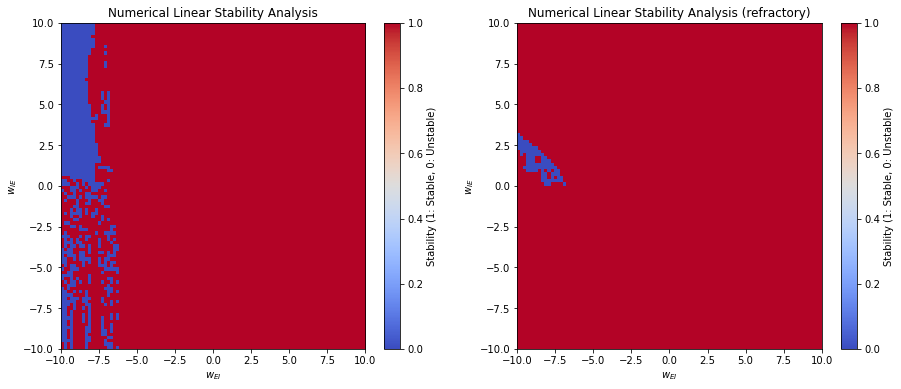

In [250]:
# Wilson-Cowan model parameters
w_EE=1
w_II = -10
h_E = 0.5
h_I = -0.5
w_EI= -1
w_IE = 1.

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Wilson-Cowan model equations
def wilson_cowan_model(x, w_EI, w_IE, h_E, h_I, refrac = False):
    E, I = x
    if refrac:
        dE = -E + (1-E) * sigmoid(w_EE * E - w_EI * I + h_E)
        dI = -I + (1-I) * sigmoid(w_IE * E - w_II * I + h_I)
    else:
        dE = -E + sigmoid(w_EE * E - w_EI * I + h_E)
        dI = -I + sigmoid(w_IE * E - w_II * I + h_I)
    return np.array([dE, dI])

# Jacobian matrix of the Wilson-Cowan model
def jacobian_matrix(x, w_EI, w_IE, refrac = False):
    E, I = x
    if refrac:
        dE_dE = -1 -E * sigmoid(w_EE * E - w_EI * I + h_E) + (1-E) * w_EE * sigmoid(w_EE * E - w_EI * I + h_E) * (1 - sigmoid(w_EE * E - w_EI * I + h_E))
        dE_dI = -(1-E) * w_EI * sigmoid(w_EE * E - w_EI * I + h_E) * (1 - sigmoid(w_EE * E - w_EI * I + h_E))
        dI_dE = (1-I) * w_IE * sigmoid(w_IE * E - w_II * I + h_I) * (1 - sigmoid(w_IE * E - w_II * I + h_I))
        dI_dI = -1 -sigmoid(w_IE * E - w_II * I + h_I) -(1-I) * w_II * sigmoid(w_IE * E - w_II * I + h_I) * (1 - sigmoid(w_IE * E - w_II * I + h_I))

    else:
        dE_dE = -1 + w_EE * sigmoid(w_EE * E - w_EI * I + h_E) * (1 - sigmoid(w_EE * E - w_EI * I + h_E))
        dE_dI = - w_EI * sigmoid(w_EE * E - w_EI * I + h_E) * (1 - sigmoid(w_EE * E - w_EI * I + h_E))
        dI_dE = w_IE * sigmoid(w_IE * E - w_II * I + h_I) * (1 - sigmoid(w_IE * E - w_II * I + h_I))
        dI_dI = -1 - w_II * sigmoid(w_IE * E - w_II * I + h_I) * (1 - sigmoid(w_IE * E - w_II * I + h_I))

    J = np.array([[ dE_dE, dI_dE],
                  [dE_dI,  dI_dI]])
    return J

# Numerical analysis
N = 100
w_EI_values = np.linspace(-10, 10, N)
w_IE_values = np.linspace(-10, 10, N)
stability_matrix = np.zeros((N, N))
stability_matrix_refrac = np.zeros((N, N))
#minf=[0,1]
for i, w_EI in enumerate(w_EI_values):
    for j, w_IE in enumerate(w_IE_values):
        # fixed point with fsolve
        fixed_point = fsolve(wilson_cowan_model, [1, 1], args=(w_EI, w_IE, h_E, h_I))
        fixed_point_refrac = fsolve(wilson_cowan_model, [1, 1], args=(w_EI, w_IE, h_E, h_I, True))
        
        J_fixed_point = jacobian_matrix(fixed_point, w_EI, w_IE)
        J_fixed_point_refrac = jacobian_matrix(fixed_point_refrac, w_EI, w_IE, True)
        
        # Calculate eigenvalues of the Jacobian matrix
        eigenvalues = np.linalg.eigvals(J_fixed_point)
        eigenvalues_refrac = np.linalg.eigvals(J_fixed_point_refrac)
      
        # stability check 
        if all(np.real(eig) < 0 for eig in eigenvalues):
            stability_matrix[i, j] = 1  # Stable
        else:
            #print (f"w_EI {w_EI} w_IE {w_IE} eigenvalues {eigenvalues} \n fixed point {fixed_point} value in f.p. {wilson_cowan_model(fixed_point,w_EI, w_IE, h_E, h_I)}")
            stability_matrix[i, j] = 0  # Unstable
        
        if all(np.real(eig) < 0 for eig in eigenvalues_refrac):
            stability_matrix_refrac[i, j] = 1  # Stable
        else:
            stability_matrix_refrac[i, j] = 0  # Unstable

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for the first stability matrix
img1 = axes[0].imshow(stability_matrix, extent=[-10, 10, -10, 10], origin='lower', cmap='coolwarm', aspect='auto')
axes[0].set_xlim(-10, 10)
axes[0].set_ylim(-10, 10)
axes[0].set_xlabel('$w_{EI}$')
axes[0].set_ylabel('$w_{IE}$')
axes[0].set_title('Numerical Linear Stability Analysis')

# Plot for the second stability matrix
img2 = axes[1].imshow(stability_matrix_refrac, extent=[-10, 10, -10, 10], origin='lower', cmap='coolwarm', aspect='auto')
axes[1].set_xlim(-10, 10)
axes[1].set_ylim(-10, 10)
axes[1].set_xlabel('$w_{EI}$')
axes[1].set_ylabel('$w_{IE}$')
axes[1].set_title('Numerical Linear Stability Analysis (refractory)')

# Add a colorbar for each subplot
plt.colorbar(img1, ax=axes[0], label='Stability (1: Stable, 0: Unstable)')
plt.colorbar(img2, ax=axes[1], label='Stability (1: Stable, 0: Unstable)')

